# Word2Vec 소개

### gensim 설치
* pip install gensim

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [3]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [4]:
# 문장을 이용하여 단어와 벡터를 생성
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [5]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [6]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [7]:
word_vectors_list

[array([ 1.03014335e-03,  7.43581040e-04, -1.58780045e-03,  4.23161604e-04,
        -2.87033297e-04,  4.76648071e-04, -1.34725147e-03, -7.30790198e-05,
        -3.06705275e-04, -7.36453396e-04,  7.20138254e-04, -2.24610474e-07,
         1.58439740e-03,  7.50742038e-04,  5.79898478e-04, -8.51562072e-04,
        -1.24627014e-03,  3.05306254e-04,  6.71691960e-04, -1.47618295e-03,
         2.78841762e-04, -1.39044994e-03,  8.33417871e-04,  6.10837480e-04,
        -2.58664251e-04,  8.39739223e-04,  8.56222177e-04,  7.00807665e-04,
         4.66077181e-04,  1.39124715e-03, -8.01037706e-04, -1.45586650e-03,
         2.12301500e-04,  5.47164062e-04,  1.50473125e-03, -1.34669256e-03,
         1.50774009e-04,  9.99582815e-04, -9.93716763e-04, -7.27180974e-04,
        -1.20377936e-03, -3.15395504e-04, -1.29206898e-03, -1.18484639e-03,
        -8.34233724e-05,  4.62716882e-04, -3.99780576e-04,  1.27455918e-03,
        -3.89025343e-04,  5.20769332e-04,  8.56048893e-04, -3.52762254e-05,
         3.6

In [8]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

-0.0776171

In [9]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

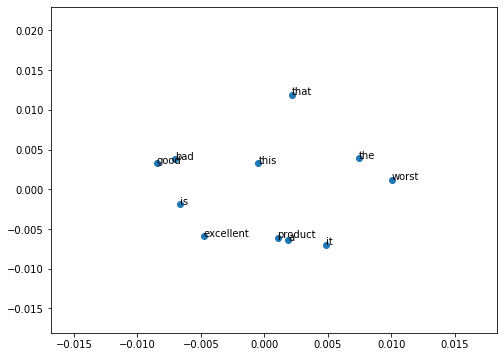

In [10]:
plot_2d_graph(vocabs, xs, ys)

In [12]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
filename = 'data/GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [13]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [14]:
len(word_vectors_list)

11

In [15]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386159

In [16]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

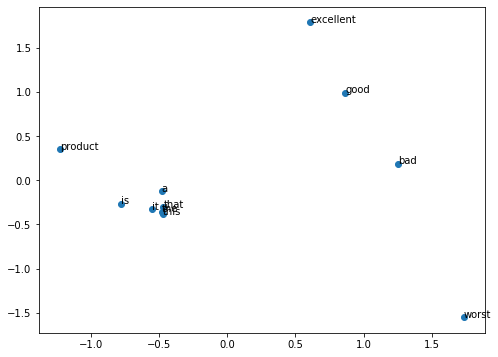

In [17]:
plot_2d_graph(vocabs, xs, ys)

In [19]:
model.save('data/01_word2vec.model')

In [21]:
model = Word2Vec.load('data/01_word2vec.model')